<a href="https://colab.research.google.com/github/infinityrun/AI/blob/master/Yolo_v3_custom_car_detection_EVA_Assignment_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/inboxpraveen/Yolo-Training-GoogleColab.git

Cloning into 'Yolo-Training-GoogleColab'...
remote: Enumerating objects: 750, done.
remote: Counting objects: 100% (750/750), done.
remote: Compressing objects: 100% (491/491), done.
remote: Total 1141 (delta 240), reused 745 (delta 240), pack-reused 391
Receiving objects: 100% (1141/1141), 183.19 MiB | 33.60 MiB/s, done.
Resolving deltas: 100% (352/352), done.
Checking out files: 100% (1927/1927), done.


In [0]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
!ls
import sys
sys.path.insert(1, './Yolo-Training-GoogleColab/')

sample_data  Yolo-Training-GoogleColab


In [0]:
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 12441, done.
remote: Total 12441 (delta 0), reused 0 (delta 0), pack-reused 12441
Receiving objects: 100% (12441/12441), 11.38 MiB | 11.06 MiB/s, done.
Resolving deltas: 100% (8489/8489), done.


In [0]:
!ls

darknet  sample_data  Yolo-Training-GoogleColab


In [0]:
!apt-get install build-essential
!apt-get install cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
libavcodec-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavcodec-dev set to manually installed.
libavformat-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libavformat-dev set to manually installed.
libswscale-dev is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libswscale-dev set to manually installed.
The following package

In [0]:
!apt-get install libavcodec-dev libavformat-dev libswscale-d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libswscale-d


In [0]:
!apt-get -y install cmake
!which cmake

!cmake --version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
/usr/local/bin/cmake
cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [0]:
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
!apt-get install vim

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgpm2 vim-common vim-runtime xxd
Suggested packages:
  gpm ctags vim-doc vim-scripts
The following NEW packages will be installed:
  libgpm2 vim vim-common vim-runtime xxd
0 upgraded, 5 newly installed, 0 to remove and 25 not upgraded.
Need to get 6,721 kB of archives.
After this operation, 32.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.1 [49.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 vim-common all 2:8.0.1453-1ubuntu1.1 [70.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgpm2 amd64 1.20.7-5 [15.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64

In [0]:
#Now let's get some YOLOv3 weights from the official site
!ls
!wget https://pjreddie.com/media/files/yolov3.weights

darknet  sample_data  Yolo-Training-GoogleColab
--2020-02-10 15:11:27--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... failed: Connection timed out.
Retrying.

--2020-02-10 15:13:37--  (try: 2)  https://pjreddie.com/media/files/yolov3.weights
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  10.0MB/s    in 34s     

2020-02-10 15:15:16 (6.96 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [0]:
#Now here we're modifying the makefile to set OPENCV and GPU to 1
!ls
!sed -i 's/OPENCV=0/OPENCV=1/g' ./darknet/Makefile
!sed -i 's/GPU=0/GPU=1/g' ./darknet/Makefile

darknet  sample_data  Yolo-Training-GoogleColab  yolov3.weights


In [0]:
!ls
%cd ../
!ls

darknet  sample_data  Yolo-Training-GoogleColab  yolov3.weights
/
bin					   etc	  opt	 sys
boot					   home   proc	 tensorflow-2.1.0
content					   lib	  root	 tmp
datalab					   lib32  run	 tools
dev					   lib64  sbin	 usr
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl  media  srv	 var
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl   mnt	  swift


In [0]:
!apt install g++-5
!apt install gcc-5

!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 25 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-bas

In [0]:
#Now, here's a bunch of code that takes the longest to execute here but
#It's about installing CUDA and using the beautiful Tesla K80 GPU, so that
#Will worth it

!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq

#Here were are installing compilers and creating some links
!apt-get install cuda -y -qq #gcc-5 g++-5 
#!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
#!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!apt update
!apt upgrade
!apt install cuda-8.0 -y

90 packages can be upgraded. Run 'apt list --upgradable' to see them.
--2020-02-10 15:16:27--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.182.215
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.182.215|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?3DCRZtfiias27PA_2hqnlM7WbdzrMGL4P0Fg9M0c0Zb4psf-7QVzCREsc98wkDJhalo5QvX4rQ5L0hH3sxhNdgxLob1gAp0Lp-fhLZfK8BydiVL5U3mWvGuiFNUCt85RXTrTPFO71Kxe23ImF7lI_I7TZNB1faF0r0JlWDOWpCsKMhvb2aYptEnjzJe7W8ACrYYnX_Zt3-UVHvfqiRfKd950FQ [following]
--2020-02-10 15:16:28--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?3DCRZtfiias27PA_2hqnlM

In [0]:
#Now let's see whether the GPU is here and CUDA was successfully installed!
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

print("'sup!'")

!/usr/local/cuda/bin/nvcc --version

/device:GPU:0
'sup!'
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
Cuda compilation tools, release 8.0, V8.0.61


In [0]:
ls

bin/                                                   mnt/
boot/                                                  opt/
content/                                               proc/
cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb  root/
datalab/                                               run/
dev/                                                   sbin/
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl              srv/
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl               swift/
etc/                                                   sys/
home/                                                  tensorflow-2.1.0/
lib/                                                   tmp/
lib32/                                                 tools/
lib64/                                                 usr/
media/                                                 var/


In [0]:
%cd ../content

/content


In [0]:
!ls

darknet  sample_data  Yolo-Training-GoogleColab  yolov3.weights


In [0]:
%cd darknet/

/content/darknet


In [0]:
!ls
!make

3rdparty      cmake		      image_yolov2.sh	     net_cam_v3.sh
appveyor.yml  CMakeLists.txt	      image_yolov3.sh	     README.md
build	      DarknetConfig.cmake.in  include		     scripts
build.ps1     darknet.py	      json_mjpeg_streams.sh  src
build.sh      darknet_video.py	      LICENSE		     video_v2.sh
cfg	      data		      Makefile		     video_yolov3.sh
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:909:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: At global scope

In [0]:
!ls

3rdparty      cmake		      image_yolov2.sh	     obj
appveyor.yml  CMakeLists.txt	      image_yolov3.sh	     README.md
backup	      darknet		      include		     results
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  scripts
build.ps1     darknet.py	      LICENSE		     src
build.sh      darknet_video.py	      Makefile		     video_v2.sh
cfg	      data		      net_cam_v3.sh	     video_yolov3.sh


In [0]:
!mv ../yolov3.weights .

In [0]:
!ls
#Now, let's see if everything works by running it on a test image
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

3rdparty      CMakeLists.txt	      include		     scripts
appveyor.yml  darknet		      json_mjpeg_streams.sh  src
backup	      DarknetConfig.cmake.in  LICENSE		     video_v2.sh
build	      darknet.py	      Makefile		     video_yolov3.sh
build.ps1     darknet_video.py	      net_cam_v3.sh	     yolov3.weights
build.sh      data		      obj
cfg	      image_yolov2.sh	      README.md
cmake	      image_yolov3.sh	      results
 CUDA-version: 8000 (10010)
, GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208

In [0]:
#Let's define some functions that will let us show images, and upload and 
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

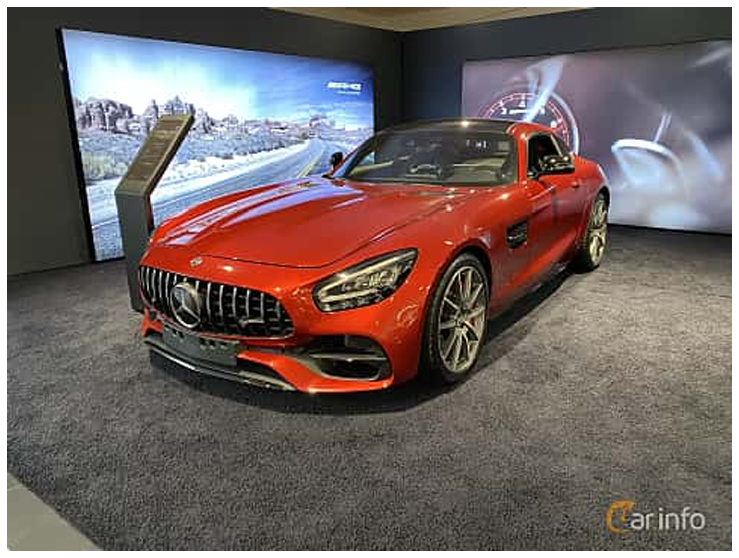

In [0]:
imShow('../Yolo-Training-GoogleColab/test.jpg')

In [0]:
!ls

3rdparty      CMakeLists.txt	      include		     results
appveyor.yml  darknet		      json_mjpeg_streams.sh  scripts
backup	      DarknetConfig.cmake.in  LICENSE		     src
build	      darknet.py	      Makefile		     video_v2.sh
build.ps1     darknet_video.py	      net_cam_v3.sh	     video_yolov3.sh
build.sh      data		      obj		     yolov3.weights
cfg	      image_yolov2.sh	      predictions.jpg
cmake	      image_yolov3.sh	      README.md


In [0]:
!mv ../Yolo-Training-GoogleColab/data_for_colab/ .

In [0]:
!./darknet detector train data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg data_for_colab/yolov3-tiny.conv.15 -dont_show

In [0]:
ls

3rdparty/                  darknet*                Makefile
appveyor.yml               DarknetConfig.cmake.in  net_cam_v3.sh*
backup/                    darknet.py              obj/
build/                     darknet_video.py        predictions.jpg
build.ps1*                 data/                   README.md
build.sh*                  data_for_colab/         results/
cfg/                       image_yolov2.sh*        scripts/
chart.png                  image_yolov3.sh*        src/
chart_yolov3-tiny-obj.png  include/                video_v2.sh*
cmake/                     json_mjpeg_streams.sh*  video_yolov3.sh*
CMakeLists.txt             LICENSE                 yolov3.weights


In [0]:
!./darknet detector test data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights ../Yolo-Training-GoogleColab/test.jpg -i 0 -thresh 0.5

 CUDA-version: 8000 (10010)
, GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF


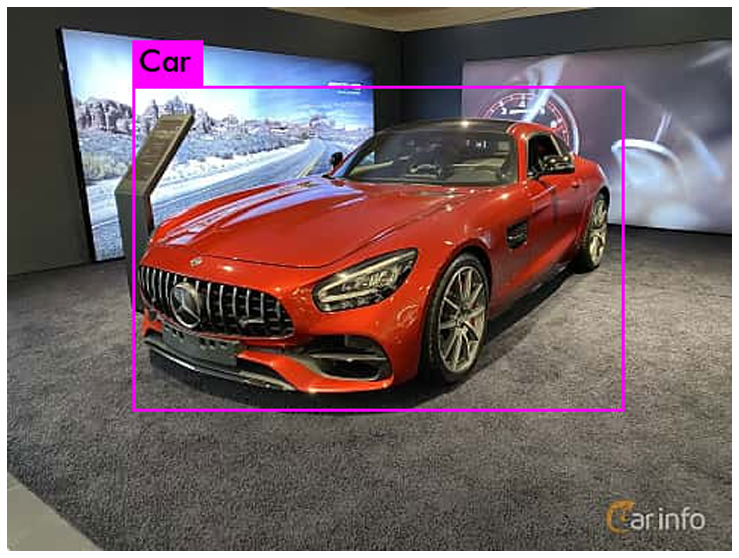

In [0]:
imShow('predictions.jpg')

 CUDA-version: 8000 (10010)
, GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF


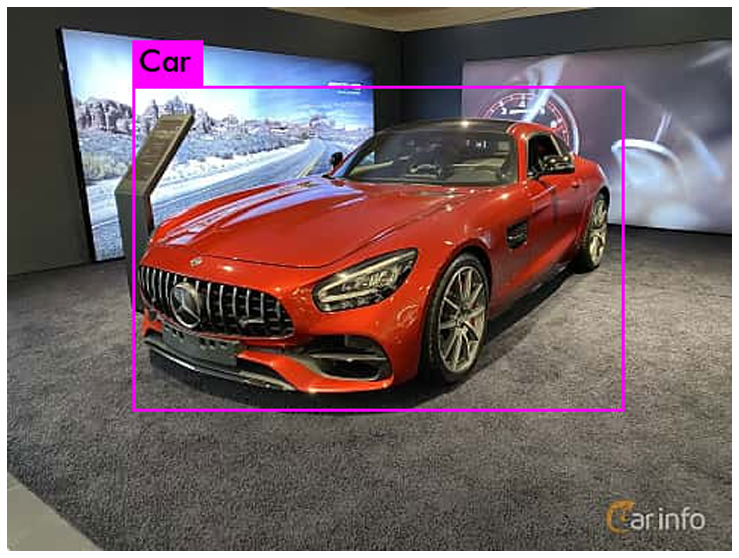

In [0]:
!./darknet detector test data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights ../Yolo-Training-GoogleColab/test.jpg -i 0 -thresh 0.5
imShow('predictions.jpg')

In [0]:
ls

3rdparty/                  darknet*                Makefile
appveyor.yml               DarknetConfig.cmake.in  net_cam_v3.sh*
backup/                    darknet.py              obj/
build/                     darknet_video.py        predictions.jpg
build.ps1*                 data/                   README.md
build.sh*                  data_for_colab/         results/
cfg/                       image_yolov2.sh*        scripts/
chart.png                  image_yolov3.sh*        src/
chart_yolov3-tiny-obj.png  include/                video_v2.sh*
cmake/                     json_mjpeg_streams.sh*  video_yolov3.sh*
CMakeLists.txt             LICENSE                 yolov3.weights


In [0]:
!./darknet detector demo data_for_colab/obj.data data_for_colab/yolov3-tiny-obj.cfg backup/yolov3-tiny-obj_last.weights  -dont_show ../video.mp4 -i 0 -out_filename output_video.avi

 CUDA-version: 8000 (10010)
, GPU count: 1  
 OpenCV version: 3.2.0
Demo
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.00